In [62]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

import os

print("Current Path", os.getcwd())


Current Path /home/alinjar/manipulator/manipulator_mujoco/plot_script


In [63]:

# 2. Load the CSV file
# Replace 'your_file.csv' with the path to your CSV file



In [64]:
import numpy as np
import pandas as pd  # Needed for pd.read_csv

# Inference settings
inference = np.array([False, True])
line_styles = ['-', '--']  # Solid for False, dashed for True


csv_path_thetadot = []
csv_path_theta = []
csv_path_avg_primal_residual = []
csv_path_avg_fixed_point_residual = []
csv_path_best_cost_primal_residual = []
csv_path_best_cost_fixed_point_residual = []


df_thetadot = []
df_theta = []
df_avg_primal_residual = []
df_avg_fixed_point_residual = []
df_best_cost_primal_residual = []
df_best_cost_fixed_point_residual = []


for i in range(len(inference)):
    folder = f'custom_data_inference_{inference[i]}'

    path_tdot = f'../{folder}/thetadot.csv'
    path_theta = f'../{folder}/theta.csv'
    path_avg_primal_residual = f'../{folder}/avg_primal_residual.csv'
    path_avg_fixed_point_residual = f'../{folder}/avg_fixed_point_residual.csv'
    path_best_cost_primal_residual = f'../{folder}/best_cost_primal_residual.csv'
    path_best_cost_fixed_point_residual = f'../{folder}/best_cost_fixed_point_residual.csv'

    csv_path_thetadot.append(path_tdot)
    csv_path_theta.append(path_theta)
    csv_path_avg_primal_residual.append(path_avg_primal_residual)
    csv_path_avg_fixed_point_residual.append(path_avg_fixed_point_residual)
    csv_path_best_cost_primal_residual.append(path_best_cost_primal_residual)
    csv_path_best_cost_fixed_point_residual.append(path_best_cost_fixed_point_residual)
    

    df_thetadot.append(pd.read_csv(path_tdot))
    df_theta.append(pd.read_csv(path_theta))
    df_avg_primal_residual.append(pd.read_csv(path_avg_primal_residual))
    df_avg_fixed_point_residual.append(pd.read_csv(path_avg_fixed_point_residual))
    df_best_cost_primal_residual.append(pd.read_csv(path_best_cost_primal_residual))
    df_best_cost_fixed_point_residual.append(pd.read_csv(path_best_cost_fixed_point_residual))





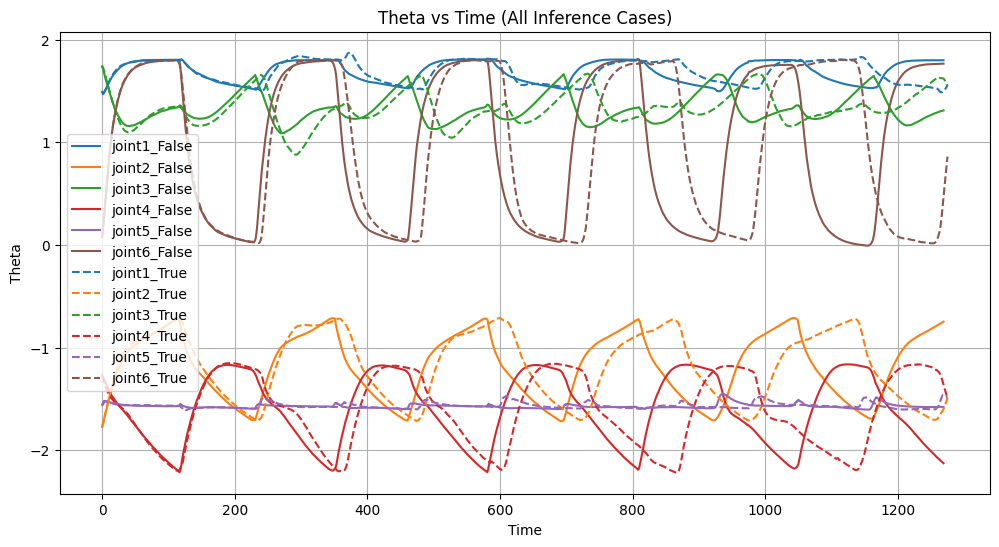

In [65]:


num_joints = df_theta[0].shape[1]
colors = plt.cm.tab10(np.arange(num_joints))

# Output folder
save_dir = "../plot_figures"
os.makedirs(save_dir, exist_ok=True)

# --- Combined plot for theta ---
plt.figure(figsize=(12, 6))
for i in range(len(inference)):
    x_col = np.linspace(0, df_theta[i].shape[0] - 1, df_theta[i].shape[0])
    for j, col in enumerate(df_theta[i].columns):
        plt.plot(
            x_col,
            df_theta[i][col],
            linestyle=line_styles[i],
            color=colors[j],
            label=f'joint{j+1}_{inference[i]}'
        )
plt.title('Theta vs Time (All Inference Cases)')
plt.xlabel('Time')
plt.ylabel('Theta')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "theta_vs_time.png"))
plt.show()


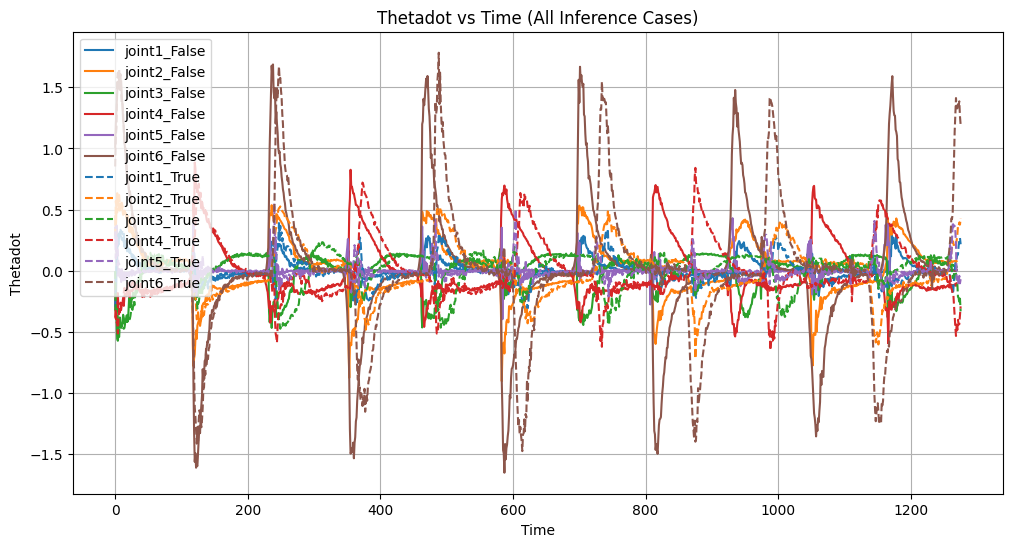

In [66]:

# --- Combined plot for thetadot ---
plt.figure(figsize=(12, 6))
for i in range(len(inference)):
    x_col = np.linspace(0, df_thetadot[i].shape[0] - 1, df_thetadot[i].shape[0])
    for j, col in enumerate(df_thetadot[i].columns):
        plt.plot(
            x_col,
            df_thetadot[i][col],
            linestyle=line_styles[i],
            color=colors[j],
            label=f'joint{j+1}_{inference[i]}'
        )
plt.title('Thetadot vs Time (All Inference Cases)')
plt.xlabel('Time')
plt.ylabel('Thetadot')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "thetadot_vs_time.png"))
plt.show()



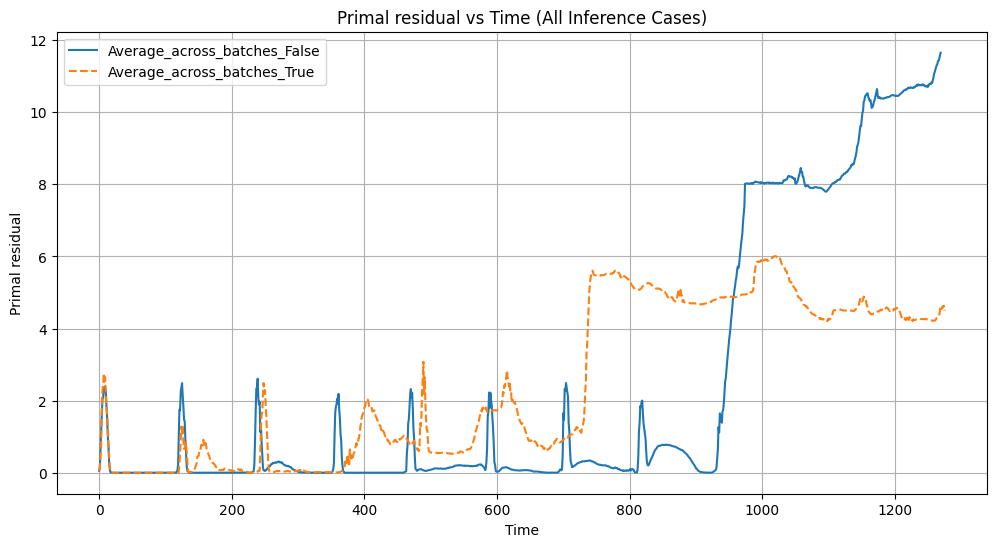

In [75]:

# --- Combined plot for Primal residual ---
plt.figure(figsize=(12, 6))
for i in range(len(inference)):
    x_col = np.linspace(0, df_avg_primal_residual[i].shape[0] - 1, df_avg_primal_residual[i].shape[0])
    for j, col in enumerate(df_avg_primal_residual[i].columns):
        plt.plot(
            x_col,
            df_avg_primal_residual[i][col],
            linestyle=line_styles[i],
            color=colors[i],
            label=f'Average_across_batches_{inference[i]}'
        )
plt.title('Primal residual vs Time (All Inference Cases)')
plt.xlabel('Time')
plt.ylabel('Primal residual')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "Avg_across_batch_primal_residual_vs_time.png"))
plt.show()



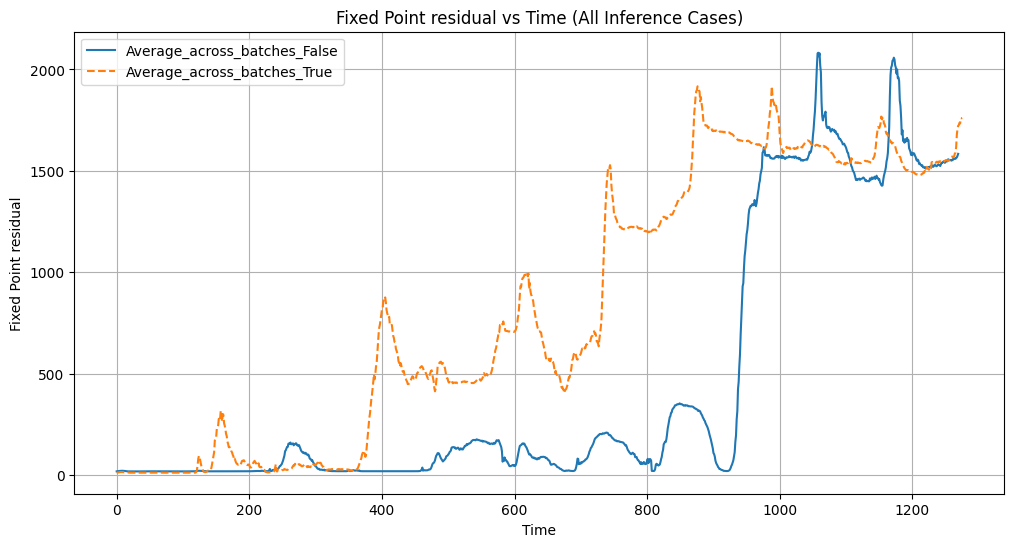

In [74]:


# --- Combined plot for Fixed Point residual ---
plt.figure(figsize=(12, 6))
for i in range(len(inference)):
    x_col = np.linspace(0, df_avg_fixed_point_residual[i].shape[0] - 1, df_avg_fixed_point_residual[i].shape[0])
    for j, col in enumerate(df_avg_fixed_point_residual[i].columns):
        plt.plot(
            x_col,
            df_avg_fixed_point_residual[i][col],
            linestyle=line_styles[i],
            color=colors[i],
            label=f'Average_across_batches_{inference[i]}'
        )
plt.title('Fixed Point residual vs Time (All Inference Cases)')
plt.xlabel('Time')
plt.ylabel('Fixed Point residual')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "Avg_across_batch_Fixed Point_residual_vs_Time.png"))
plt.show()


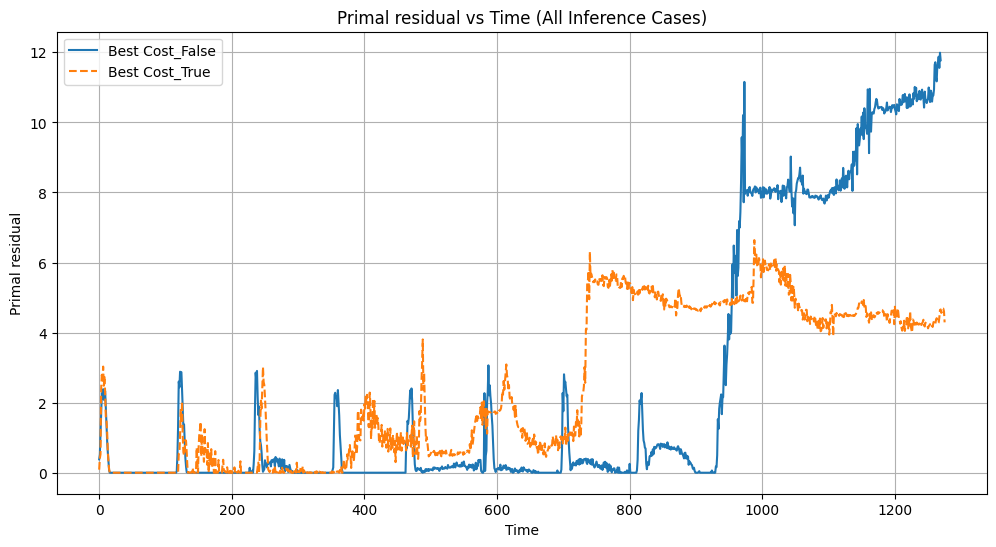

In [73]:

# --- Combined plot for Primal residual ---
plt.figure(figsize=(12, 6))
for i in range(len(inference)):
    x_col = np.linspace(0, df_best_cost_primal_residual[i].shape[0] - 1, df_best_cost_primal_residual[i].shape[0])
    for j, col in enumerate(df_best_cost_primal_residual[i].columns):
        plt.plot(
            x_col,
            df_best_cost_primal_residual[i][col],
            linestyle=line_styles[i],
            color=colors[i],
            label=f'Best Cost_{inference[i]}'
        )
plt.title('Primal residual vs Time (All Inference Cases)')
plt.xlabel('Time')
plt.ylabel('Primal residual')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "best_cost_batch_primal_residual_vs_time.png"))
plt.show()

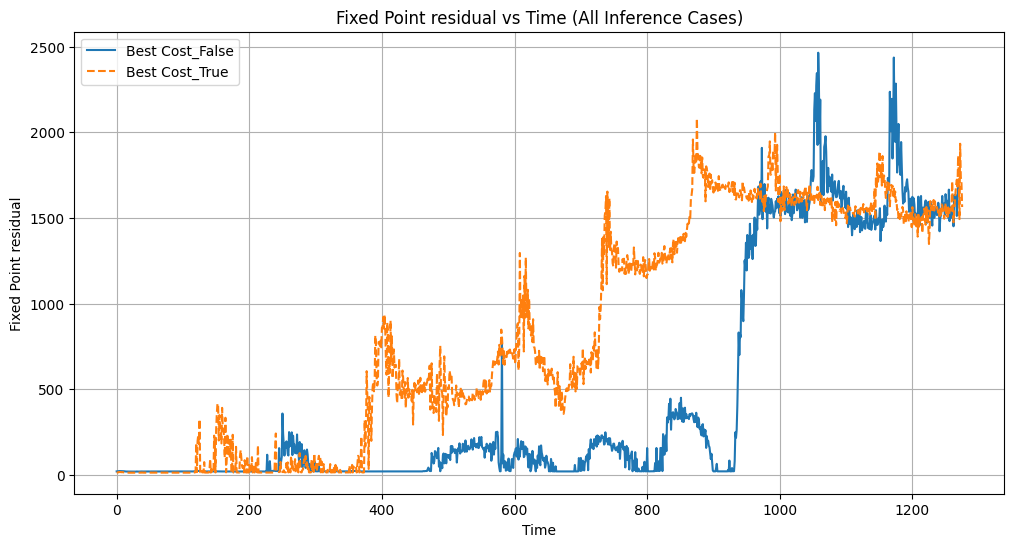

In [72]:

# --- Combined plot for Fixed Point residual ---
plt.figure(figsize=(12, 6))
for i in range(len(inference)):
    x_col = np.linspace(0, df_best_cost_fixed_point_residual[i].shape[0] - 1, df_best_cost_fixed_point_residual[i].shape[0])
    for j, col in enumerate(df_best_cost_fixed_point_residual[i].columns):
        plt.plot(
            x_col,
            df_best_cost_fixed_point_residual[i][col],
            linestyle=line_styles[i],
            color=colors[i],
            label=f'Best Cost_{inference[i]}'
        )
plt.title('Fixed Point residual vs Time (All Inference Cases)')
plt.xlabel('Time')
plt.ylabel('Fixed Point residual')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "best_cost_batch_Fixed Point_residual_vs_Time.png"))
plt.show()

(1270, 6)


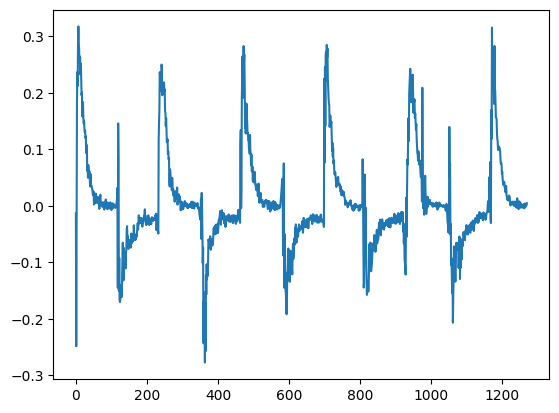

0      -0.013476
1      -0.248210
2      -0.005137
3       0.179213
4       0.236544
          ...   
1265    0.001088
1266   -0.001285
1267    0.001974
1268    0.000886
1269    0.004835
Name: -1.568468958139419556e-01, Length: 1270, dtype: float64


In [71]:

print(df_thetadot[0].shape)
plt.figure()
plt.plot(df_thetadot[0].iloc[:, 0])
plt.show()

print(df_thetadot[0].iloc[:,0])

